# Load dataset

**record name , balanced sample**
- record 04015 -> 4000
- record 04043 -> 1000
- record 04048 -> 900
- record 04908 -> tidak bisa di split karena hanya AF
- record 04936 -> 2000
- record 05091 -> 1000, class 0 29
- record 05121 -> 1000, class 0, 150
- record 05261 -> 1000, class 0 105
- record 06426 -> 2000
- record 06453 -> 300
- record 06995 -> 900
- record 07910 -> 320
- record 08215 -> 400

In [ ]:
record = "08215"

n_samples = 400

In [2]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

In [3]:
# filenames

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [5]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt.csv' % record, header=None)

In [6]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.081081,0.081081,0.103604,0.081081,0.076577,0.081081,0.085586,0.094595,0.085586,0.099099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.067568,0.076577,0.094595,0.144144,0.207207,0.315315,0.337838,0.355856,0.238739,-0.054054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.369369,0.220721,-0.022523,-0.324324,-0.626126,-0.855856,-0.864865,-0.693694,-0.518018,-0.351351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.301802,0.099099,-0.211712,-0.536036,-0.797297,-0.896396,-0.779279,-0.590090,-0.405405,-0.229730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.310811,0.094595,-0.198198,-0.518018,-0.788288,-0.887387,-0.797297,-0.612613,-0.427928,-0.202703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [7]:
X = ecg_df.iloc[:,:300].values
y = ecg_df.iloc[:,300].values

le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)

 categorical label :  ['AF' 'N']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [9]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 300 titik data , kolom terakhir merupakan label untuk tiap sequence

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.145714,-0.005714,-0.180000,-0.322857,-0.365714,-0.288571,-0.171429,-0.080000,0.005714,0.065714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.263889,0.078704,-0.189815,-0.541667,-0.842593,-0.912037,-0.726852,-0.537037,-0.328704,-0.189815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.254464,0.165179,-0.062500,-0.375000,-0.678571,-0.888393,-0.946429,-0.848214,-0.660714,-0.491071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.146825,0.007937,-0.238095,-0.507937,-0.746032,-0.873016,-0.714286,-0.555556,-0.412698,-0.253968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.291667,0.162037,-0.078704,-0.379630,-0.703704,-0.898148,-0.916667,-0.759259,-0.578704,-0.402778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [11]:
#print dataset distribution

train_df[300]=train_df[300].astype(int)
equilibre=train_df[300].value_counts()

print(equilibre)

1    413
0    112
Name: 300, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

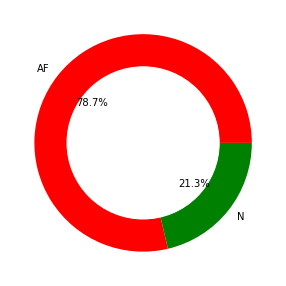

In [12]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [13]:
# sampling and resampling dataset

from sklearn.utils import resample

random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[300]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
476,0.183938,0.132124,0.002591,-0.163212,-0.323834,-0.422280,-0.388601,-0.282383,-0.183938,-0.093264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
260,0.399160,0.315126,0.147059,-0.084034,-0.352941,-0.550420,-0.550420,-0.390756,-0.231092,-0.096639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
397,0.439394,0.510101,0.585859,0.666667,0.732323,0.757576,0.520202,0.345960,0.244949,0.270202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78,0.129032,-0.064516,-0.310484,-0.544355,-0.693548,-0.657258,-0.487903,-0.346774,-0.225806,-0.080645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
486,0.141129,0.028226,-0.165323,-0.427419,-0.677419,-0.806452,-0.709677,-0.532258,-0.375000,-0.225806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [15]:
# cek balanced dataset

equilibre=train_df[300].value_counts()

print(equilibre)

1    400
0    400
Name: 300, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [16]:
ECG_PER_CLASS =train_df.groupby(300,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
476,0.183938,0.132124,0.002591,-0.163212,-0.323834,-0.422280,-0.388601,-0.282383,-0.183938,-0.093264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
161,0.006623,-0.142384,-0.350993,-0.536424,-0.658940,-0.536424,-0.394040,-0.264901,-0.165563,-0.122517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [18]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:300]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [19]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

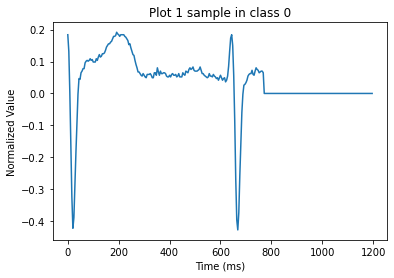

In [20]:
plot_1_sample(class_number=0)

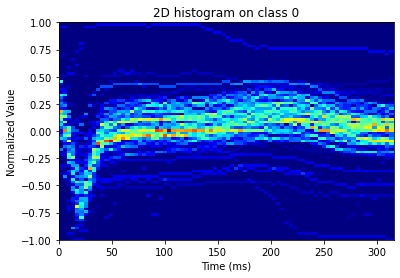

In [21]:
plot_hist(class_number=0, min_=0, size=80)

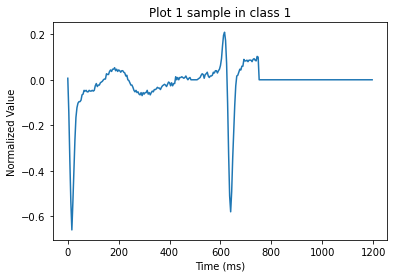

In [22]:
plot_1_sample(class_number=1)

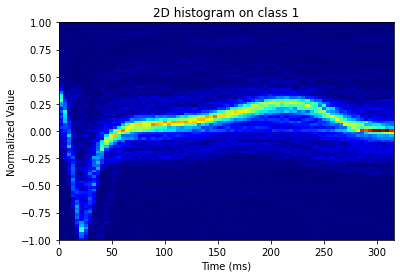

In [23]:
plot_hist(class_number=1, min_=0, size=80)

### Save Balanced Training Data and Test Data

In [24]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)